# Alucar - Analisando as vendas



In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
alucar.shape

(24, 2)

In [5]:
alucar.isna().sum()

mes       0
vendas    0
dtype: int64

In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
import seaborn as sns

In [9]:
%matplotlib inline

In [10]:
from matplotlib import pyplot as plt

In [11]:
print(sns.__version__)

0.11.0


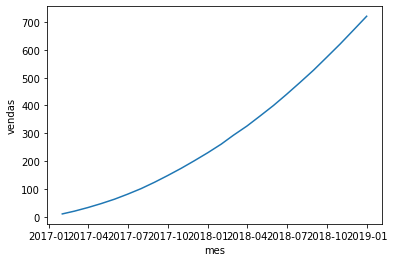

In [12]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

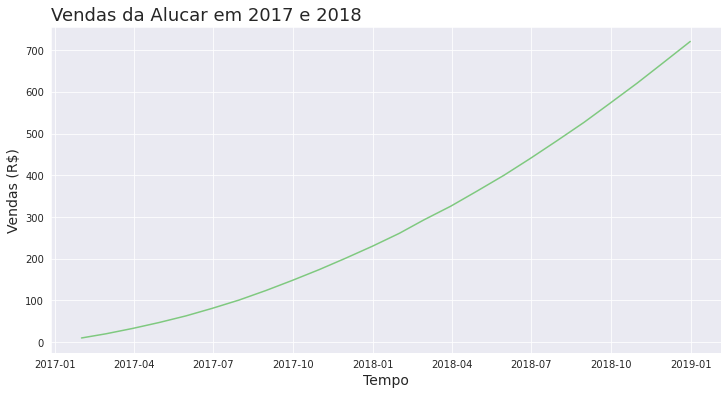

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas da Alucar em 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [14]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


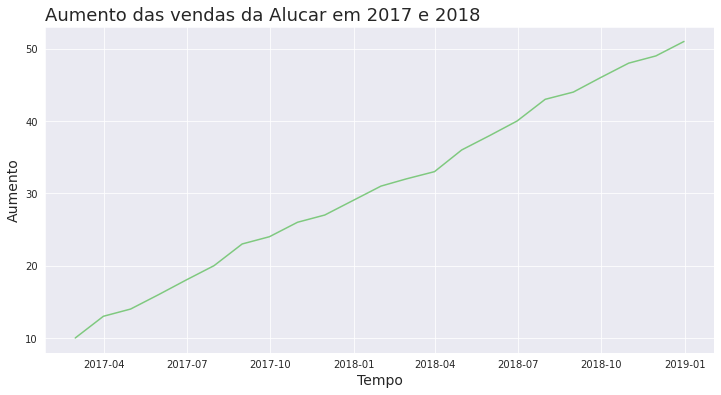

In [15]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas da Alucar em 2017 e 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
plt.show()

In [16]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x = x, y = y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'left', fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

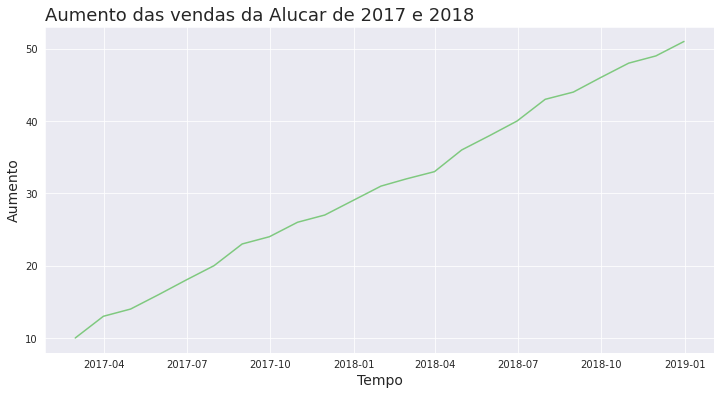

In [17]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes',
       'aumento', alucar)

In [18]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


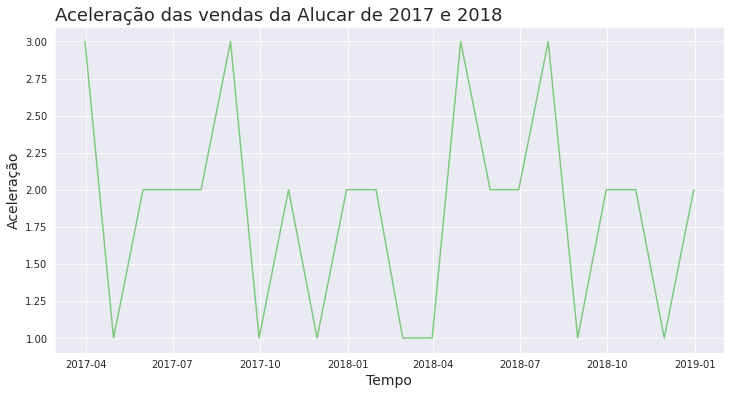

In [19]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 
       'Aceleração', 'mes', 'aceleracao', alucar)

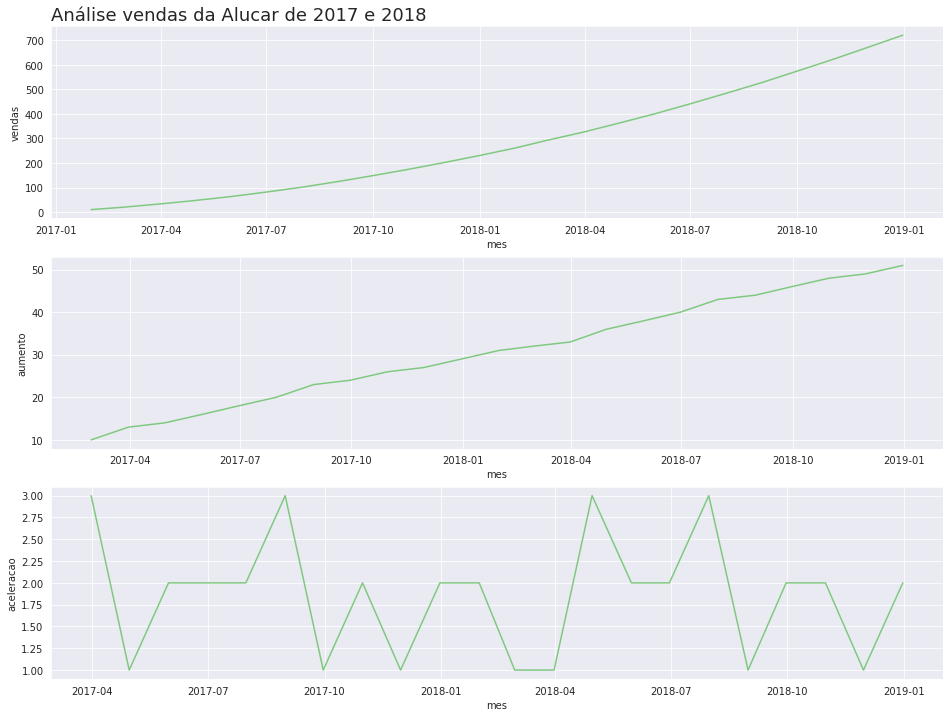

In [20]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise vendas da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'mes', y = 'aumento', data = alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x = 'mes', y = 'aceleracao', data = alucar)
ax = ax

In [21]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x = x, y = y1, data = dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x = x, y = y2, data = dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x = x, y = y3, data = dataset)
  ax = ax


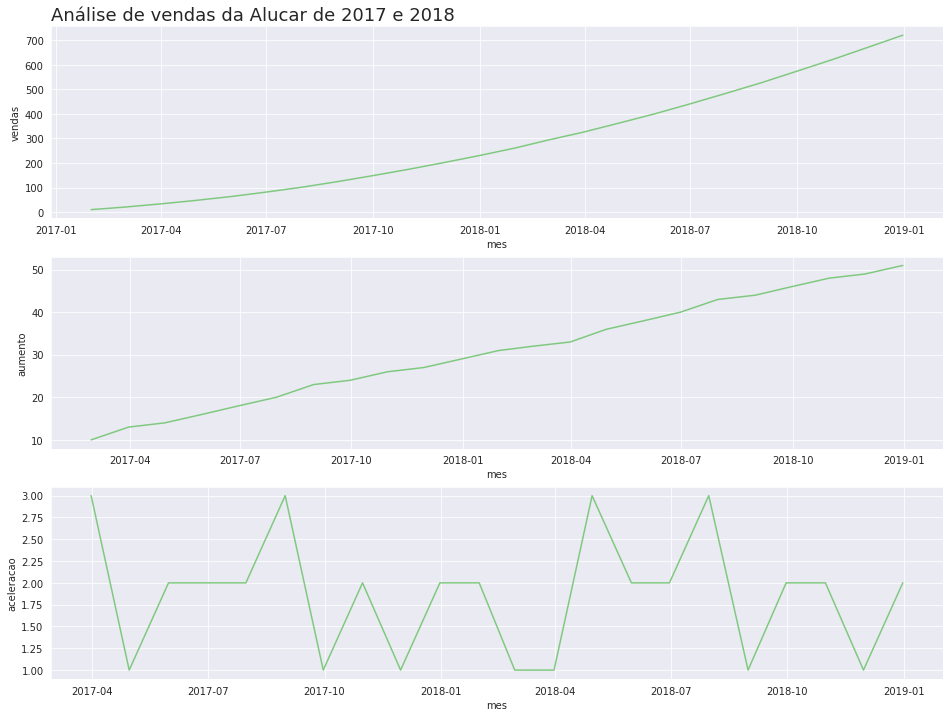

In [22]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise de vendas da Alucar de 2017 e 2018')

In [23]:
from pandas.plotting import autocorrelation_plot

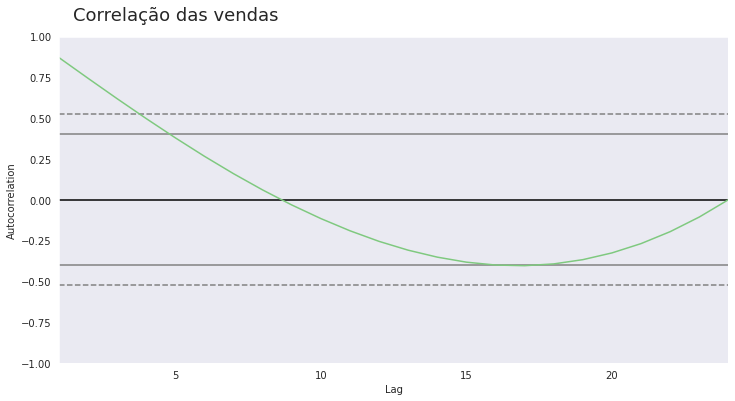

In [24]:
ax = plt.figure(figsize =(12, 6))
ax.suptitle('Correlação das vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

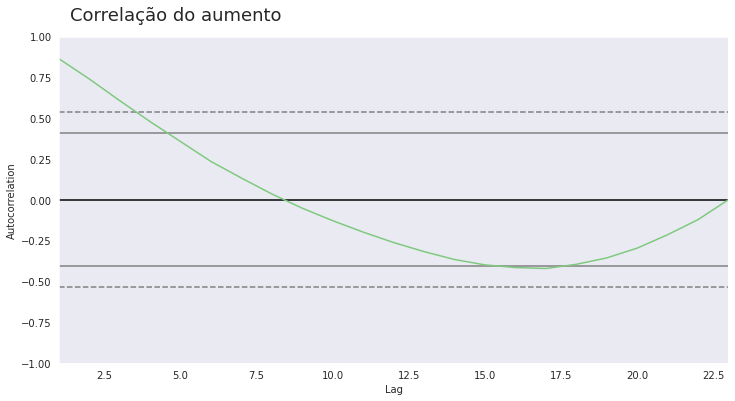

In [25]:
ax = plt.figure(figsize =(12, 6))
ax.suptitle('Correlação do aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

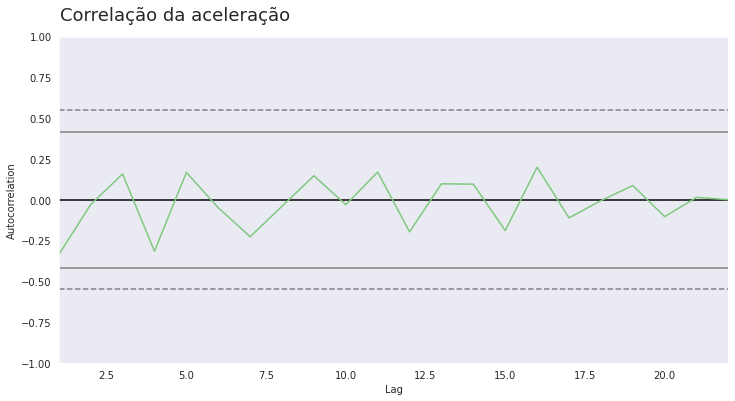

In [26]:
ax = plt.figure(figsize =(12, 6))
ax.suptitle('Correlação da aceleração', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

#Alucar - Analisando assinantes da newsletter

In [27]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [28]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [29]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [30]:
assinantes.shape

(24, 2)

In [31]:
assinantes.isna().sum().sum()

0

In [32]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [33]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [34]:
assinantes['aumento'] = assinantes['assinantes'].diff()

In [35]:
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [36]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


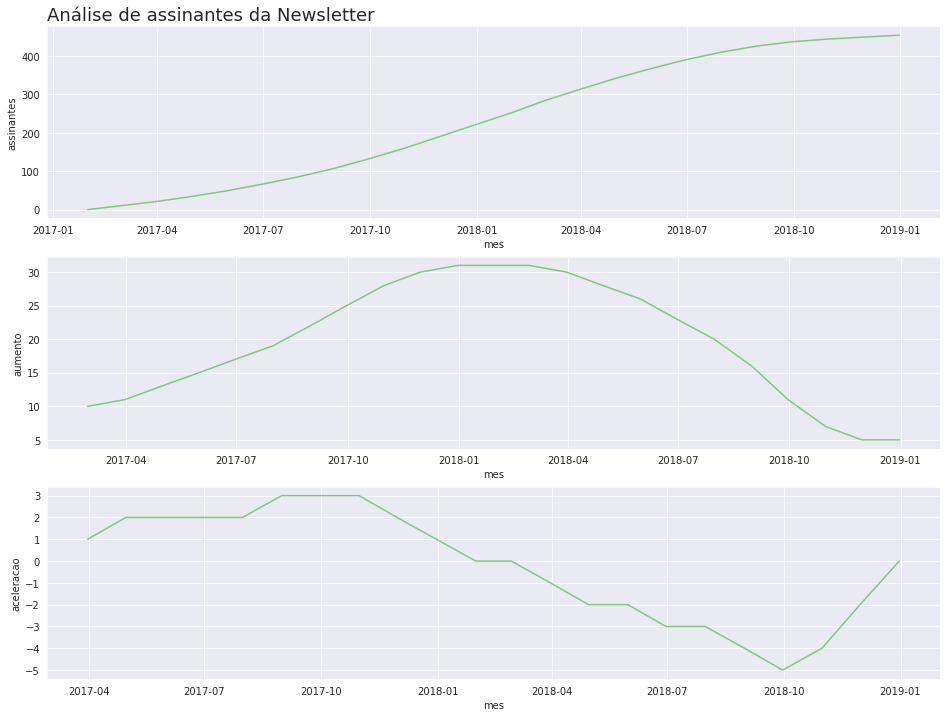

In [37]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da Newsletter')

In [38]:
choco = pd.read_csv('chocolura.csv')

In [39]:
choco.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [40]:
choco.dtypes

mes       object
vendas     int64
dtype: object

In [41]:
choco['mes'] = pd.to_datetime(choco['mes'])

In [42]:
choco.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [43]:
choco.shape

(24, 2)

In [44]:
choco.isna().sum().sum()

0

In [45]:
choco['aumento'] = choco['vendas'].diff()

In [46]:
choco['aceleracao'] = choco['aumento'].diff()

In [47]:
choco.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


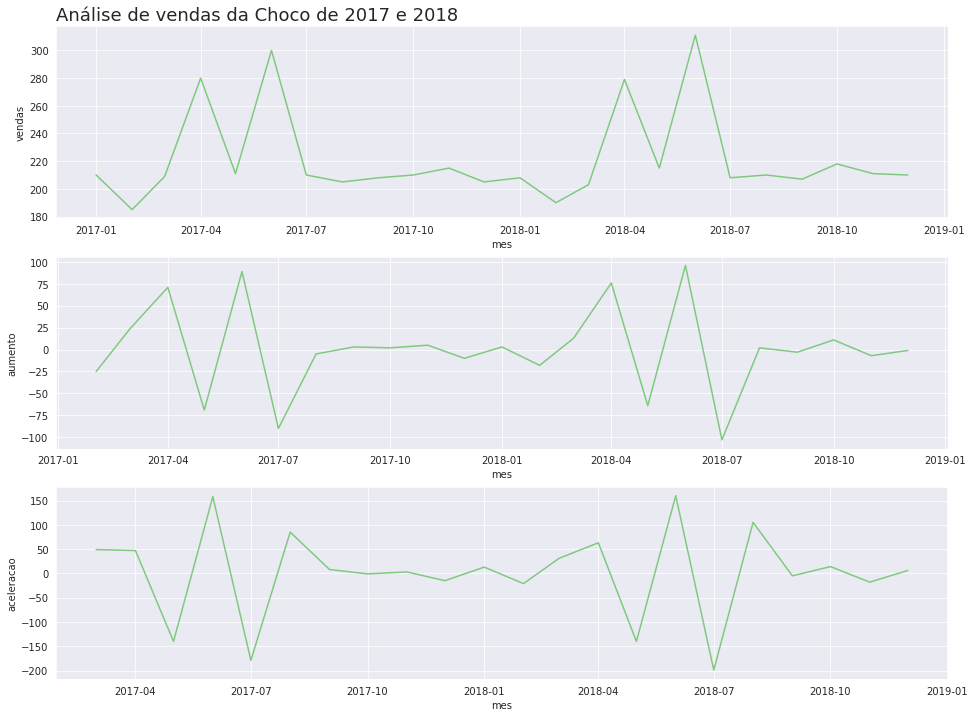

In [48]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', choco, 'Análise de vendas da Choco de 2017 e 2018')

#Chocolura - Vendas diarias (Outubro e Novembro)

In [49]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')

In [50]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [51]:
vendas_por_dia.shape

(61, 2)

In [52]:
vendas_por_dia.isna().sum().sum()

0

In [53]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [54]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [55]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [56]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()

In [57]:
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

In [58]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


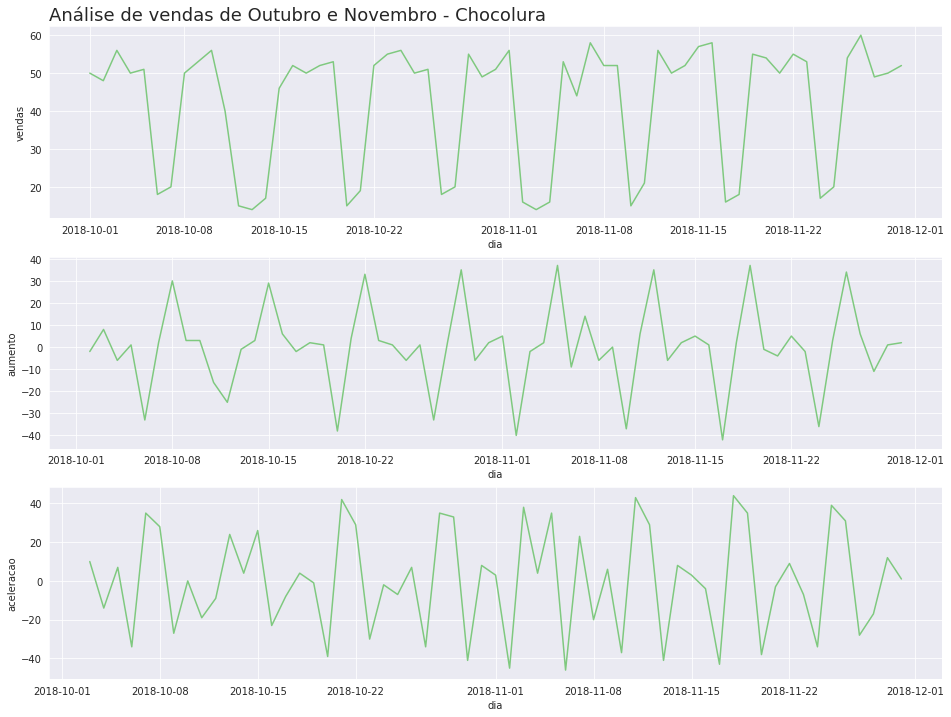

In [59]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

# Analisando a sazonalidade

In [60]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [61]:
vendas_por_dia.head(61)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Monday
57,2018-11-27,60,6.0,-28.0,Tuesday
58,2018-11-28,49,-11.0,-17.0,Wednesday
59,2018-11-29,50,1.0,12.0,Thursday


In [62]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [63]:
dias_traduzidos = {'Monday' : 'Segunda-Feira',
                  'Tuesday' : 'Terça-Feira',
                  'Wednesday' : 'Quarta-Feira',
                  'Thursday' : 'Quinta-Feira',
                  'Friday' : 'Sexta-Feira',
                  'Saturday' : 'Sábado',
                  'Sunday' : 'Domingo'}

In [64]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [65]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-Feira
1,2018-10-02,48,-2.0,NaN,Terça-Feira
2,2018-10-03,56,8.0,10.0,Quarta-Feira
3,2018-10-04,50,-6.0,-14.0,Quinta-Feira
4,2018-10-05,51,1.0,7.0,Sexta-Feira
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda-Feira
8,2018-10-09,53,3.0,-27.0,Terça-Feira
9,2018-10-10,56,3.0,0.0,Quarta-Feira


#Agrupando os dias

In [66]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()

In [67]:
vendas_agrupadas.head()

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta-Feira,53.0,1.0,2.0
Quinta-Feira,51.0,-2.0,-3.0
Segunda-Feira,52.0,34.0,31.0
Sexta-Feira,45.0,-7.0,-5.0


**Correlação de Vendas**

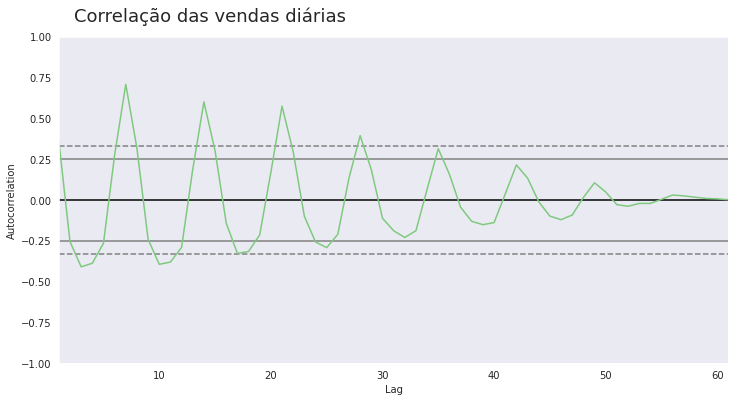

In [68]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize = '18', x = 0.3, y = 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

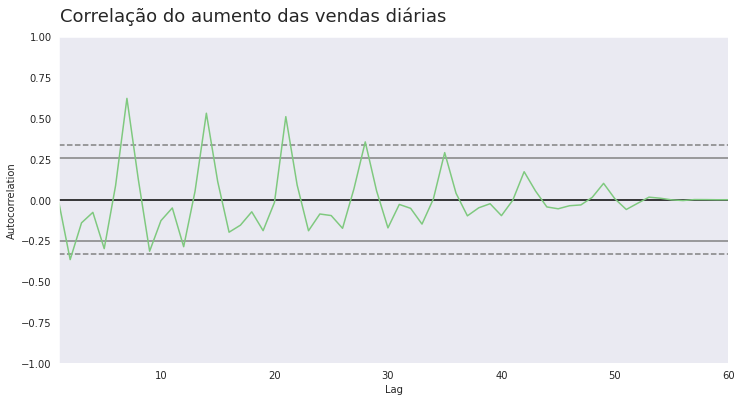

In [69]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize = '18', x = 0.35, y = 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

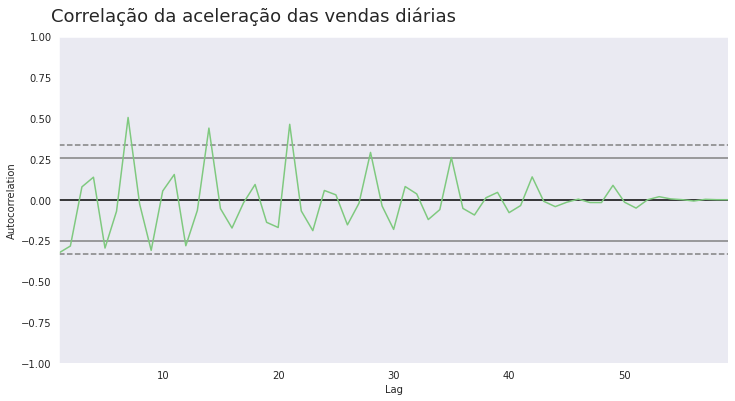

In [70]:
ax = plt.figure(figsize = (12, 6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize = '18', x = 0.35, y = 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

In [71]:
cafelura = pd.read_csv('cafelura.csv')

In [72]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [74]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [75]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [76]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [78]:
# opção: cafelura.isna().sum().sum()
cafelura.isna().sum()

mes       0
vendas    0
dtype: int64

In [79]:
cafelura.shape

(24, 2)

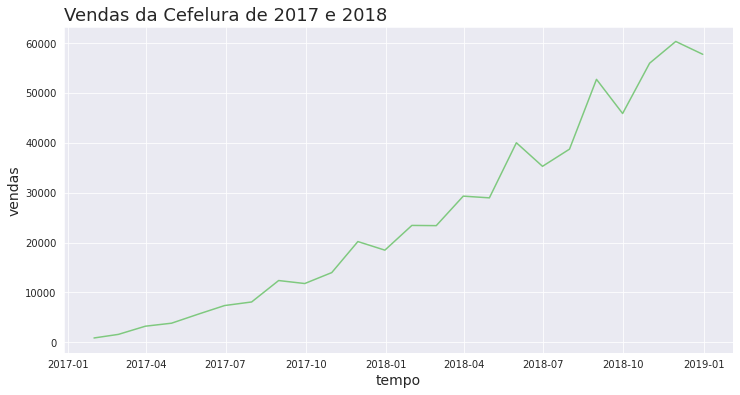

In [80]:
plotar('Vendas da Cefelura de 2017 e 2018', 'tempo', 'vendas', 'mes', 'vendas', cafelura)

In [81]:
qt_dias_fds = pd.read_csv('dias_final_de_semana.csv')

In [82]:
qt_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [84]:
qt_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [87]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / qt_dias_fds['quantidade_de_dias'].values

In [88]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


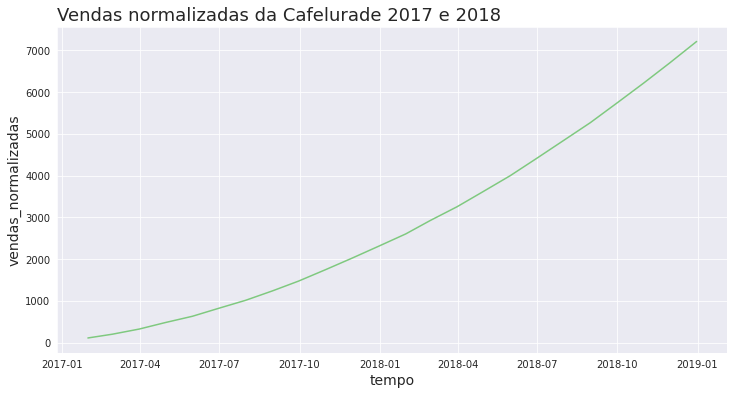

In [90]:
plotar('Vendas normalizadas da Cafelurade 2017 e 2018', 'tempo', 'vendas_normalizadas', 'mes', 'vendas_normalizadas', cafelura)

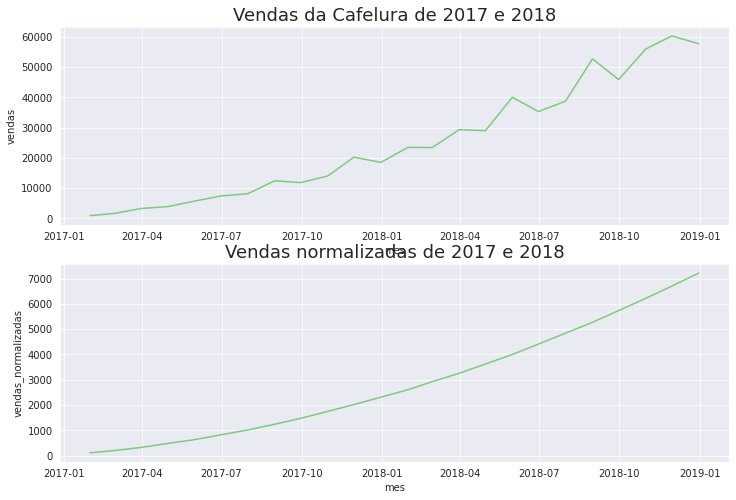

In [94]:
plt.figure(figsize = (12, 8))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas da Cafelura de 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data = cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas normalizadas de 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data = cafelura)
ax = ax

#Statsmodels

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

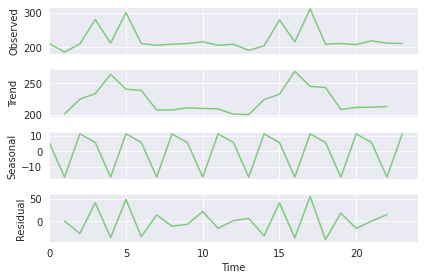

In [107]:
resultado = seasonal_decompose([choco['vendas']], freq = 3)
ax = resultado.plot()

In [108]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [109]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


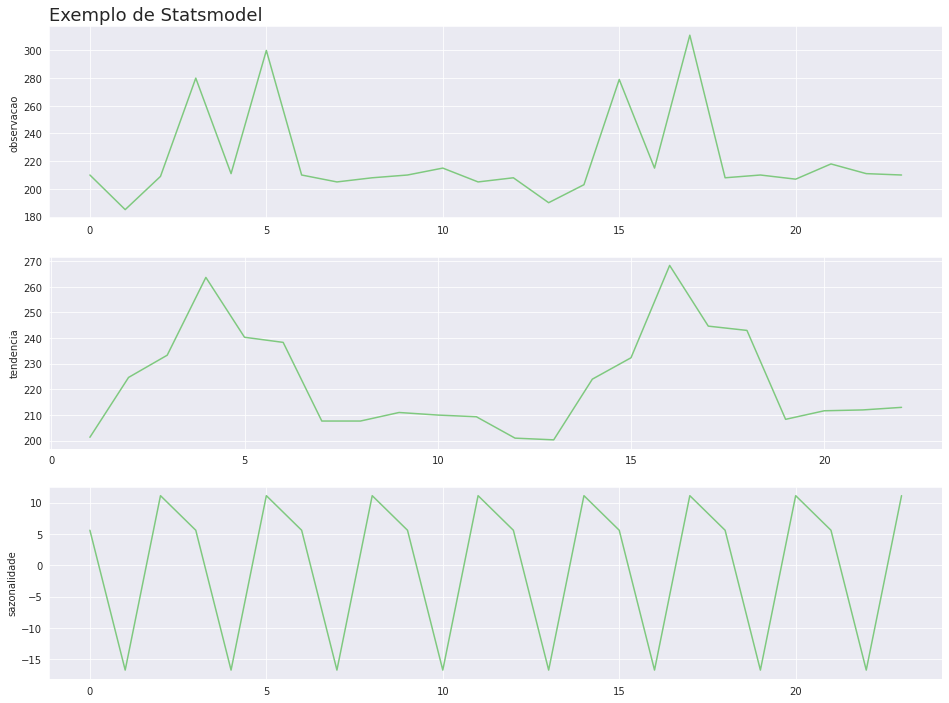

In [113]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodel ')

#Alucel - Análise de vendas

In [114]:
alucel = pd.read_csv('alucel.csv')

In [116]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [117]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [118]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [119]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [120]:
alucel.shape

(61, 2)

In [122]:
alucel.isna().sum()

dia       0
vendas    0
dtype: int64

In [123]:
alucel['aumento'] = alucel['vendas'].diff()

In [127]:
alucel['aceleracao'] = alucel['aumento'].diff()

In [128]:
alucel.head()

,dia,vendas,aumento,aeleracao,aceleracao
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,-1136.19
3,2018-10-04,1939.02,78.66,403.99,403.99
4,2018-10-05,1946.17,7.15,-71.51,-71.51


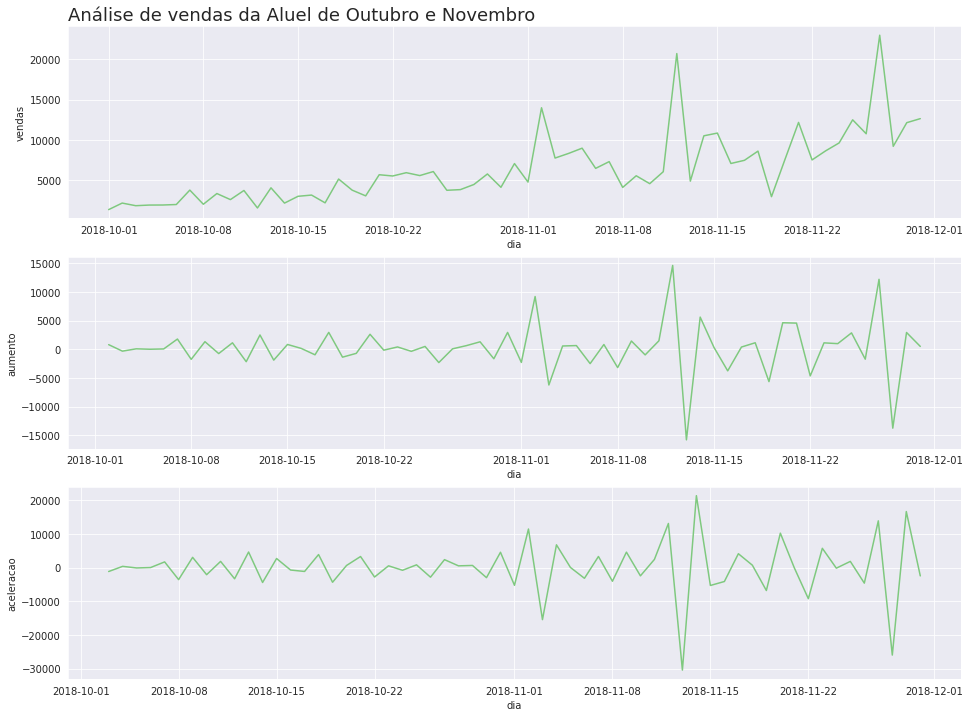

In [129]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Aluel de Outubro e Novembro')

**Média móvel**

In [131]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [133]:
alucel.head(7)

,dia,vendas,aumento,aeleracao,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,1727.46,2157.861429


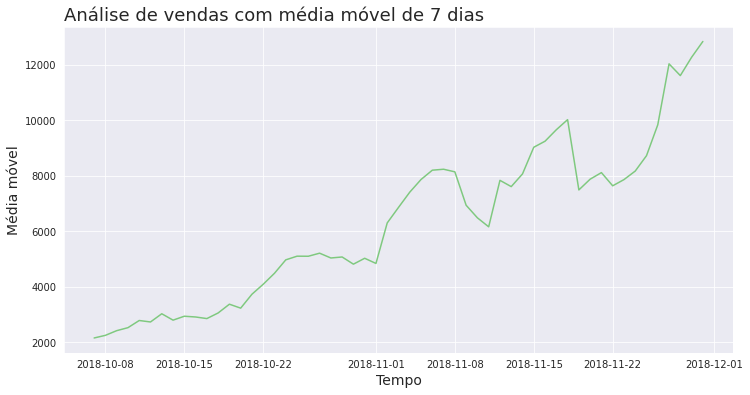

In [138]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel', alucel)

In [136]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

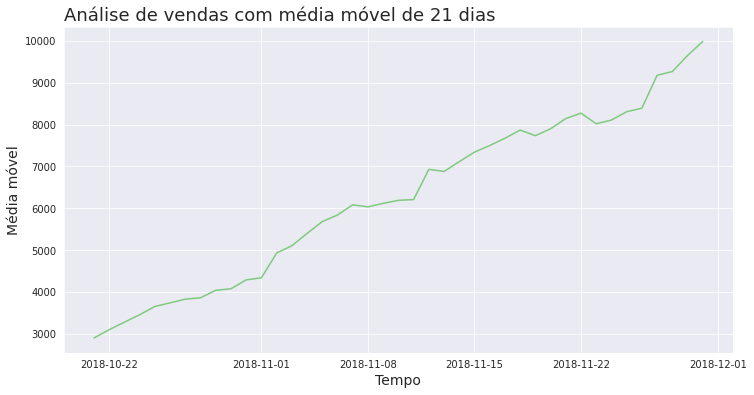

In [139]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel_21', alucel)

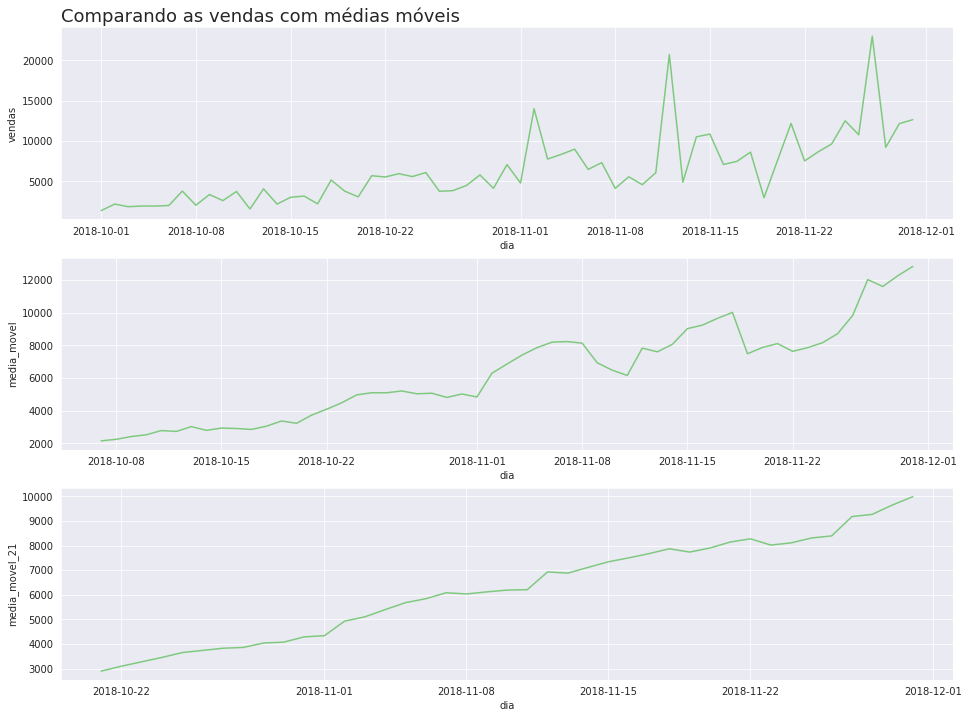

In [140]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com médias móveis')